In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pygam as gm
import copy as cp

In [15]:
dataframe = pd.read_pickle('../data_GG/GAM/species_fit_301_0.01.pkl')
myspecies = 'Abies,Pinus,Juniperus,Taxus,Betula,Corylus,Alnus,Carpinus,Salix,Ulmus,Populus,Acer,Fraxinus,Fagus,Tilia,Juglans,Castanea,Quercus caducifolio,Quercus perennifolio,Pistacia,Rhamnus,Phillyrea,Buxus,Sambucus,Viburnum,Sanguisorba,Tamarix,Thymelaeaceae,Ephedra distachya,Ephedra fragilis,Ericaceae,Hereda helix,Ilex aquifolium,Viscum album,Lonicera,Vitis,Oleaceae,Myrtus,Olea,Poaceae,Lygeum spartum,Artemisia,Cichorioideae,Asteroideae,Cardueae,Rubiaceae,Centaurea,Chenopodiaceae,Caryophyllaceae,Plantago,Brassicaceae,Saxifragaceae,Fabaceae,Genista,Lotus type,Trifolium type,Rosaceae,Ribes,Boraginaceae,Sedum,Helianthemum,Lamiaceae,Urticaceae,Rumex,Berberidaceae,Euphorbiaceae,Primulaceae,Scrophulariaceae,Papaver,Campanulaceae,Convolvulaceae,Liliaceae,Iridaceae,Crassulaceae,Ranunculaceae,Cistaceae,Galium,Apiaceae,Valerianaceae,Cerealia type,Polygonaceae,Ranunculus'.split(',')
myspecies = 'Alchemilla,Chenopodiaceae,Artemisia,Cichoroideae,Asteroideae,Carduus,Asteraceae,Vernonia,Polygonum,Tribulus,Galium,Brassicaceae,Caryophylaceae,Swertia,Senecio,Erica,Hypericum,Anthospermum,Cerastium,Apiaceae,Podocarpus,Euclea,Hagenia,Juniperus,Myrsine,Rapanea,Rosa,Schefflera,Brucea,Sapotaceae,Iridaceae,Anthyllis,Maytenus,Buxus,Psydrax,Celastraceae,Celtis,Dodonaea,Ekebergia,Ephedra,Clematis,Myrica,Hypoestes,Ziziphus,Acanthus,Allophylus,Acacia,Combretum,Commiphora,Cussonia,Dobera,Lannea,Macaranga,Olea,Jasminum,Rhus,Securinega,Teclea,Zanthoxylum,Cassia,Capparidaceae,Acalypha,Euphorbia,Euphorbiacea,Phyllantus,Tamarindus,Alchornea,Aloe,Asphodellus,Leguminosae,Rubiaceae,Blepharis,Justicia,Heliotropium,Kohautia,Indigofera,Lamiaceae,Cerealia,Plantago,Planceolata,Poaceae,Rumex,Solanum,Urticaceae,Ricinus,Saussurea'.replace(' ','_').split(',')

In [17]:
# how many of myspecies are in the columns of dataframe
columns = dataframe.columns.tolist()
myspecies_in_columns = [s for s in myspecies if s in columns]
print(len(columns))
print(len(myspecies))
print(len(myspecies_in_columns))

99
86
83


In [2]:
def clean_basa_pollen_concentration(mydf_pollen, myspecies):
    mydf_pollen['cal BP'] = - mydf_pollen['cal BP']
    mydf_pollen = mydf_pollen.fillna(0)
    mydf_pollen = mydf_pollen.sort_values(by=['cal BP'])

    all_species = list(mydf_pollen.columns)

    # create a dictionary to map conflicting species names
    species_mapping = {
        "Dec_Querc": "Quercus caducifolio",
        "Ever_Querc": "Quercus perennifolio",
        "Ephedra dist": "Ephedra distachya",
        "Ephedra frag": "Ephedra fragilis",
        "Lygeum": "Lygeum spartum",
        "Cicho": "Cichorioideae",
        "Astroi": "Asteroideae",
        "Carduaceae": "Cardueae",
        "Rubiac": "Rubiaceae",
        "Chenopo": "Chenopodiaceae",
        "Caryphy": "Caryophyllaceae",
        "Brassicac": "Brassicaceae",
        "Saxifrag": "Saxifragaceae",
        "Boraginac": "Boraginaceae",
        "Helianthem": "Helianthemum",
        "Euphorbiac": "Euphorbiaceae",
        "Primulac": "Primulaceae",
        "Scrophulari": "Scrophulariaceae",
        "Campanulac": "Campanulaceae",
        "Valerian": "Valerianaceae",
        "Cerealia": "Cerealia type",
        "Polygon": "Polygonaceae"
    }
    # Sanguisorba and Ribes do not appear. Sanguisorba has 0 pollen, Ribes is not zero but not in the list
    myspecies.remove('Sanguisorba')
    myspecies.remove('Ribes')

    # replace the column names in mydf_pollen_concentration
    mydf_pollen = mydf_pollen.rename(columns=species_mapping)

    metrics_list = ['accrate', 'volume', 'lycadd', 'lyc']

    mydf_pollen = mydf_pollen[['cal BP'] + metrics_list + myspecies] # not taking into account the lycadd / lyc factor
    mydf_pollen = mydf_pollen.set_index('cal BP')

    conversion = mydf_pollen['accrate'] / mydf_pollen['volume']
    # print(mydf_pollen[myspecies])
    for spec in myspecies:
        mydf_pollen[spec] = mydf_pollen[spec] * conversion

    return mydf_pollen

# mydf = clean_basa_pollen_concentration(mydf_pollen_concentration, myspecies)

# for spec in myspecies[:]: # ITERATE OVER A COPY
#         if mydf[spec].sum() == 0:
#             print('Species %s has all zeros!' %(spec))
#             myspecies.remove(spec)
#             mydf = mydf.drop(columns=[spec])


(-300.0, 66.0)

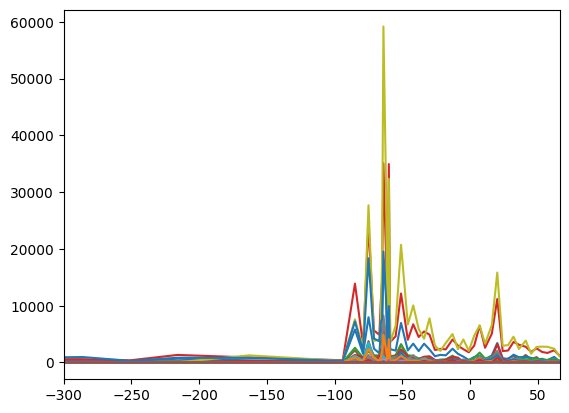

In [17]:
dirdatain = '../data_GG/'

myspecies = 'Alchemilla,Chenopodiaceae,Artemisia,Cichoroideae,Asteroideae,Carduus,Asteraceae,Vernonia,Polygonum,Tribulus,Galium,Brassicaceae,Caryophylaceae,Swertia,Senecio,Erica,Hypericum,Anthospermum,Cerastium,Apiaceae,Podocarpus,Euclea,Hagenia,Juniperus,Myrsine,Rapanea,Rosa,Schefflera,Brucea,Sapotaceae,Iridaceae,Anthyllis,Maytenus,Buxus,Psydrax,Celastraceae,Celtis,Dodonaea,Ekebergia,Ephedra,Clematis,Myrica,Hypoestes,Ziziphus,Acanthus,Allophylus,Acacia,Combretum,Commiphora,Cussonia,Dobera,Lannea,Macaranga,Olea,Jasminum,Rhus,Securinega,Teclea,Zanthoxylum,Cassia,Capparidaceae,Acalypha,Euphorbia,Euphorbiacea,Phyllantus,Tamarindus,Alchornea,Aloe,Asphodellus,Leguminosae,Rubiaceae,Blepharis,Justicia,Heliotropium,Kohautia,Indigofera,Lamiaceae,Cerealia,Plantago,Planceolata,Poaceae,Rumex,Solanum,Urticaceae,Ricinus,Saussurea'.replace(' ','_').split(',')

mydf_GG_original = pd.read_csv(dirdatain + 'bale_pollen.csv')

mydf_GG_original['kaBP'] = - mydf_GG_original['kaBP']
mydf_GG_original = mydf_GG_original.fillna(0)
mydf_GG_original = mydf_GG_original.sort_values(by=['kaBP'])

all_species = list(mydf_GG_original.columns)
metrics_list = ['accrate', 'volume', 'Lycopodium', 'Lyc.conc']

mydf_GG_original['kaBP'] = mydf_GG_original['kaBP'] * 1000  # Convert from ka to years
mydf_GG_original.rename(columns={'kaBP': 'cal BP'}, inplace=True)

mydf_pollen = mydf_GG_original[['cal BP'] + metrics_list + myspecies]
mydf_pollen = mydf_pollen.set_index('cal BP')

conversion = mydf_pollen['Lyc.conc'] * mydf_pollen['accrate'] / (mydf_pollen['volume'] * mydf_pollen['Lycopodium'])

for spec in myspecies:
    mydf_pollen[spec] = mydf_pollen[spec] * conversion

mydf_pollen = mydf_pollen[myspecies]
plt.plot(mydf_pollen)
plt.xlim(-300, mydf_pollen.index.max())

In [ ]:
pd.read_pickle('results_basa/multipliers.pkl').values

array([0.0477193 , 0.08242424, 0.0647619 , 0.068     , 0.07157895,
       0.07351351, 0.08470588, 0.06545455, 0.072     , 0.06697674,
       0.06564103, 0.08228571, 0.05913043, 0.06564103, 0.07351351,
       0.05333333, 0.08685714, 0.08941176, 0.0647619 , 0.06333333,
       0.08444444, 0.06545455, 0.07511628, 0.076     , 0.09228571,
       0.06705882, 0.07069767, 0.0890625 , 0.07414634, 0.092     ,
       0.08886364, 0.09583333, 0.08918367, 0.09409091, 0.10454545,
       0.09536585, 0.10567568, 0.09945946, 0.10289474, 0.092     ,
       0.08568627, 0.092     , 0.09297872, 0.10658537, 0.09387755,
       0.09627907, 0.115     , 0.11794872, 0.10658537, 0.10222222,
       0.115     , 0.06333333, 0.09290323, 0.08470588, 0.06857143,
       0.07783784, 0.07384615, 0.06545455, 0.08228571, 0.08774194,
       0.0612766 , 0.07414634, 0.08      , 0.084     , 0.076     ,
       0.0608    , 0.06909091, 0.08228571, 0.06808511, 0.0969697 ,
       0.05423729, 0.06204082, 0.07148936, 0.0702439 , 0.076  

In [44]:
dirdatain = '../data/'

myspecies = 'Abies,Pinus,Juniperus,Taxus,Betula,Corylus,Alnus,Carpinus,Salix,Ulmus,Populus,Acer,Fraxinus,Fagus,Tilia,Juglans,Castanea,Quercus caducifolio,Quercus perennifolio,Pistacia,Rhamnus,Phillyrea,Buxus,Sambucus,Viburnum,Sanguisorba,Tamarix,Thymelaeaceae,Ephedra distachya,Ephedra fragilis,Ericaceae,Hereda helix,Ilex aquifolium,Viscum album,Lonicera,Vitis,Oleaceae,Myrtus,Olea,Poaceae,Lygeum spartum,Artemisia,Cichorioideae,Asteroideae,Cardueae,Rubiaceae,Centaurea,Chenopodiaceae,Caryophyllaceae,Plantago,Brassicaceae,Saxifragaceae,Fabaceae,Genista,Lotus type,Trifolium type,Rosaceae,Ribes,Boraginaceae,Sedum,Helianthemum,Lamiaceae,Urticaceae,Rumex,Berberidaceae,Euphorbiaceae,Primulaceae,Scrophulariaceae,Papaver,Campanulaceae,Convolvulaceae,Liliaceae,Iridaceae,Crassulaceae,Ranunculaceae,Cistaceae,Galium,Apiaceae,Valerianaceae,Cerealia type,Polygonaceae,Ranunculus'.split(',')

# mydf_pollen_concentration = pd.read_csv(dirdatain+'basa_char_par.csv')
mydf_basa_original = pd.read_csv(dirdatain+'basa_original.csv')
mydf = clean_basa_pollen_concentration(mydf_basa_original, myspecies)

for spec in myspecies[:]: # ITERATE OVER A COPY
        if mydf[spec].sum() == 0:
            print('Species %s has all zeros!' %(spec))
            myspecies.remove(spec)
            mydf = mydf.drop(columns=[spec])

Species Lygeum spartum has all zeros!


In [10]:
delta13

,age (kyr BP),depth (mm),d13C (permil)
0,0.000,0.00,-8.12
1,0.010,1.00,-9.50
2,0.010,2.00,-9.49
3,0.020,3.00,-9.03
4,0.020,4.00,-8.46
...,...,...,...
1284,12.640,728.75,-6.74
1285,12.652,729.75,-6.47
1286,12.665,730.75,-6.50
1287,12.678,731.75,-6.24


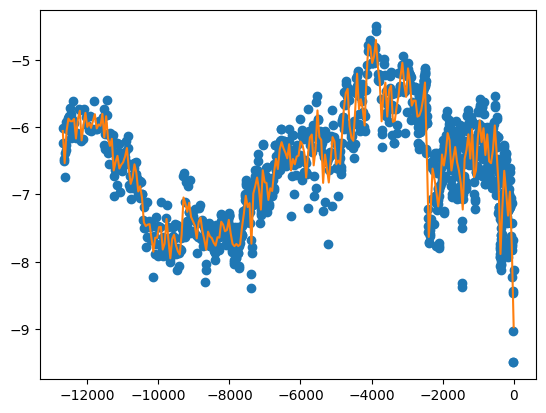

In [ ]:
dirdatain = '../data/'
delta13 = pd.read_csv(f'{dirdatain}/Mendukilo.csv')
delta13['age (kyr BP)'] = - delta13['age (kyr BP)'] * 1000  # Convert from kyr to years
delta13 = delta13.fillna(0)
delta13 = delta13.sort_values(by=['age (kyr BP)'])

vx = gm.utils.make_2d(delta13['age (kyr BP)'], verbose=False).astype('float')
vy = delta13['d13C (permil)']

d13gam = gm.GAM(terms='auto', n_splines=240, lam=0.01).fit(vx, vy)

YY = d13gam.predict(XX)
plt.plot(delta13['age (kyr BP)'], delta13['d13C (permil)'], 'o', label='data')
plt.plot(XX[:, 0], YY, label='GAM fit')

In [10]:
pd.read_pickle(f'GAM_species/d13gam_fit_140_0.01.pkl')


,age (kyr BP),d13C (permil)
0,-9798.000000,-7.546014
1,-9727.101439,-7.549505
2,-9656.202878,-7.911953
3,-9585.304317,-7.588157
4,-9514.405755,-7.724763
...,...,...
135,-226.694245,-6.824054
136,-155.795683,-7.299368
137,-84.897122,-7.126990
138,-13.998561,-8.730904


In [ ]:
import pandas as pd
pd.read_pickle(f'GAM_species/species_fit_140_0.01.pkl')['Abies']['x']

array([-9798.        , -9727.10143885, -9656.2028777 , -9585.30431655,
       -9514.4057554 , -9443.50719424, -9372.60863309, -9301.71007194,
       -9230.81151079, -9159.91294964, -9089.01438849, -9018.11582734,
       -8947.21726619, -8876.31870504, -8805.42014388, -8734.52158273,
       -8663.62302158, -8592.72446043, -8521.82589928, -8450.92733813,
       -8380.02877698, -8309.13021583, -8238.23165468, -8167.33309353,
       -8096.43453237, -8025.53597122, -7954.63741007, -7883.73884892,
       -7812.84028777, -7741.94172662, -7671.04316547, -7600.14460432,
       -7529.24604317, -7458.34748201, -7387.44892086, -7316.55035971,
       -7245.65179856, -7174.75323741, -7103.85467626, -7032.95611511,
       -6962.05755396, -6891.15899281, -6820.26043165, -6749.3618705 ,
       -6678.46330935, -6607.5647482 , -6536.66618705, -6465.7676259 ,
       -6394.86906475, -6323.9705036 , -6253.07194245, -6182.17338129,
       -6111.27482014, -6040.37625899, -5969.47769784, -5898.57913669,
      